In [1]:
pip install threadpoolctl==3.1.0

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from scipy.stats import norm
import warnings

In [23]:
# Suppress all warnings
warnings.filterwarnings("ignore")

In [24]:
# Load the dataset
hotel_data = pd.read_csv('hotel_bookings.csv')

In [25]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [26]:
# Drop rows with missing values
hotel_data.dropna(inplace=True)

In [27]:
#Describing the hotel data
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.00000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0,217.000000,217.000000,217.000000
mean,0.078341,40.520737,2015.465438,38.198157,10.824885,1.56682,4.631336,1.410138,0.036866,0.0,0.069124,0.009217,0.147465,1.285714,202.617512,262.105991,0.0,63.793733,0.092166,0.198157
std,0.269329,61.748375,0.720053,12.890292,7.582065,1.49270,3.552846,0.520406,0.232788,0.0,0.254252,0.135769,0.717768,1.251454,111.487444,103.602708,0.0,38.823568,0.289929,0.546365
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2015.000000,33.000000,6.000000,0.00000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,185.000000,281.000000,0.0,40.000000,0.000000,0.000000
50%,0.000000,27.000000,2015.000000,45.000000,9.000000,2.00000,4.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,185.000000,281.000000,0.0,48.000000,0.000000,0.000000
75%,0.000000,36.000000,2016.000000,46.000000,13.000000,2.00000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,324.000000,281.000000,0.0,85.000000,0.000000,0.000000
max,1.000000,364.000000,2017.000000,53.000000,31.000000,9.00000,21.000000,3.000000,2.000000,0.0,1.000000,2.000000,7.000000,6.000000,444.000000,499.000000,0.0,246.000000,1.000000,3.000000


In [28]:
#Exclude non numeric columns
numeric_data=hotel_data.select_dtypes(include=[np.number])

#Correlation matrix
corr_matrix=numeric_data.corr()

corr_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,-0.039767,-0.069527,-0.003159,0.002215,-0.133996,-0.105148,-0.032118,0.027563,NaN,-0.011839,-0.019837,-0.012140,0.015698,-0.034460,-0.043769,NaN,-0.057069,-0.092895,-0.105983
lead_time,-0.039767,1.000000,0.232138,0.106130,0.068615,0.097390,-0.001527,0.345290,-0.061248,NaN,-0.136182,-0.024873,-0.102228,-0.052918,-0.369766,0.249593,NaN,0.240089,-0.089066,-0.001975
arrival_date_year,-0.069527,0.232138,1.000000,-0.768645,0.367765,-0.293971,-0.437521,0.105956,0.145736,NaN,0.278636,0.145344,0.206977,-0.482208,-0.175110,-0.037900,NaN,0.495254,-0.073376,0.399946
arrival_date_week_number,-0.003159,0.106130,-0.768645,1.000000,-0.147198,0.310536,0.424158,-0.022524,-0.113531,NaN,-0.348873,-0.175642,-0.208829,0.407445,0.068700,0.266991,NaN,-0.316452,0.001284,-0.233704
arrival_date_day_of_month,0.002215,0.068615,0.367765,-0.147198,1.000000,-0.148268,-0.322588,0.071086,0.158432,NaN,0.164811,0.172475,0.119611,-0.268911,-0.252158,-0.042122,NaN,0.275325,-0.038957,0.338099
stays_in_weekend_nights,-0.133996,0.097390,-0.293971,0.310536,-0.148268,1.000000,0.841841,-0.109940,-0.140356,NaN,-0.054922,-0.025897,-0.004918,0.341655,-0.038306,0.113399,NaN,-0.192612,0.092679,-0.013472
stays_in_week_nights,-0.105148,-0.001527,-0.437521,0.424158,-0.322588,0.841841,1.000000,-0.153215,-0.106640,NaN,-0.166413,-0.069705,-0.045755,0.498610,0.169143,0.113393,NaN,-0.352100,0.087073,-0.138681
adults,-0.032118,0.345290,0.105956,-0.022524,0.071086,-0.109940,-0.153215,1.000000,0.180337,NaN,-0.075300,-0.053748,-0.051119,-0.102568,-0.292686,-0.097755,NaN,0.413196,-0.098274,0.071058
children,0.027563,-0.061248,0.145736,-0.113531,0.158432,-0.140356,-0.106640,0.180337,1.000000,NaN,0.113186,-0.010801,0.216683,-0.083999,-0.071879,0.064336,NaN,0.397079,-0.050577,0.087897
babies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def plot_hotel_types(data):
    """
    Plot the distribution of hotel types.

    Args:
    data (DataFrame): Input hotel booking data.

    Returns:
    None
    """
    hotel_type_counts = data['hotel'].value_counts()
    plt.figure(figsize=(6, 6))
    hotel_type_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
    plt.title('Distribution of Hotel Types')
    plt.xlabel('Hotel Type')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [29]:
#Kurtosis
kurtosis=numeric=numeric_data.kurtosis()
print("\nKurtosis")
print(kurtosis)


Kurtosis
is_canceled                         8.061790
lead_time                           8.849490
arrival_date_year                  -0.011785
arrival_date_week_number            1.296140
arrival_date_day_of_month           0.685533
stays_in_weekend_nights             4.413705
stays_in_week_nights                1.679977
adults                             -0.905510
children                           50.688089
babies                              0.000000
is_repeated_guest                   9.792633
previous_cancellations            217.000000
previous_bookings_not_canceled     51.510799
booking_changes                     1.367679
agent                              -0.653327
company                             0.974351
days_in_waiting_list                0.000000
adr                                 4.552636
required_car_parking_spaces         6.119133
total_of_special_requests           9.044167
dtype: float64


In [31]:
#Skewness
skewness = numeric_data.skew()
print("\nSkewness:")
print(skewness)


Skewness:
is_canceled                        3.160312
lead_time                          3.058796
arrival_date_year                  1.210897
arrival_date_week_number          -1.572404
arrival_date_day_of_month          1.148081
stays_in_weekend_nights            1.589074
stays_in_week_nights               1.069057
adults                             0.664830
children                           6.924722
babies                             0.000000
is_repeated_guest                  3.420886
previous_cancellations            14.730920
previous_bookings_not_canceled     6.672838
booking_changes                    1.161003
agent                             -0.333925
company                           -0.937438
days_in_waiting_list               0.000000
adr                                1.913951
required_car_parking_spaces        2.839510
total_of_special_requests          3.007648
dtype: float64


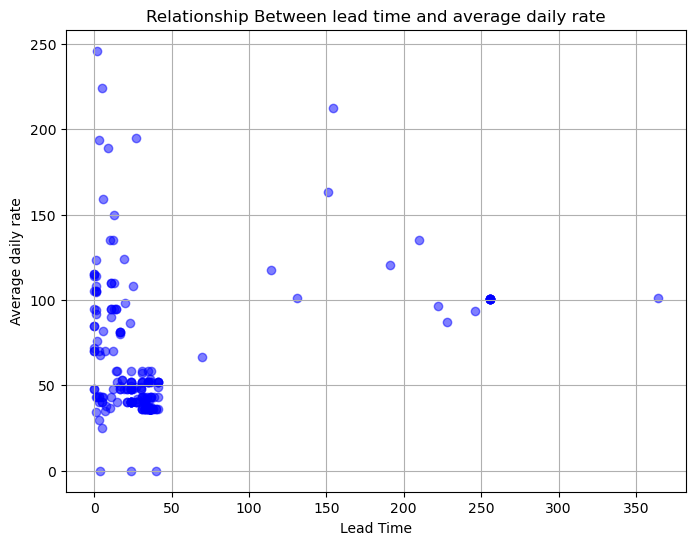

In [35]:
def create_relational_graph(x, y):
    """
    Create a scatter plot to visualize the relationship between two variables.

    Parameters:
    x (array-like): Data for the x-axis.
    y (array-like): Data for the y-axis.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.xlabel('Lead Time')
    plt.ylabel('Average daily rate')
    plt.title('Relationship Between lead time and average daily rate')
    plt.grid(True)
    plt.show()


create_relational_graph(hotel_data['lead_time'], hotel_data['adr'])

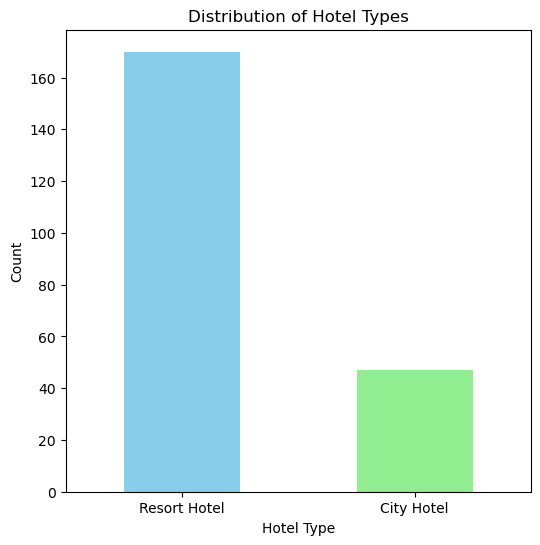

In [4]:
# Plot hotel types distribution
plot_hotel_types(hotel_data)

def plot_lead_time_vs_adr(data):
    """
    Plot lead time vs. average daily rate.

    Args:
    data (DataFrame): Input hotel booking data.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='lead_time', y='adr', data=data, alpha=0.5)
    plt.title('Lead Time vs. Average Daily Rate')
    plt.xlabel('Lead Time')
    plt.ylabel('Average Daily Rate')
    plt.show()

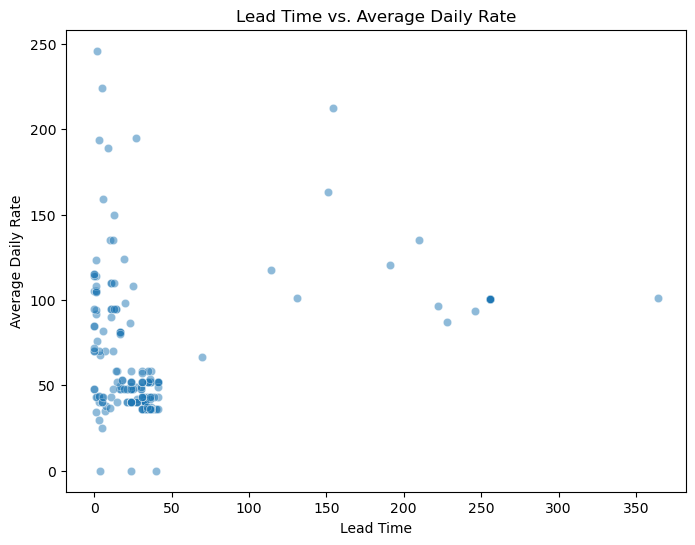

In [5]:
# Plot lead time vs. ADR
plot_lead_time_vs_adr(hotel_data)

def kmeans_clustering(data, n_clusters):
    """
    Perform K-means clustering on the data.

    Args:
    data (DataFrame): Input data for clustering.
    n_clusters (int): Number of clusters.

    Returns:
    KMeans: Fitted K-means model.
    """
    cluster_features = data[['lead_time', 'adr']]
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_features)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    return kmeans


In [6]:
# Perform K-means clustering
kmeans_model = kmeans_clustering(hotel_data, n_clusters=4)
hotel_data['kmeans_cluster'] = kmeans_model.labels_

def hierarchical_clustering(data, n_clusters):
    """
    Perform hierarchical clustering on the data.

    Args:
    data (DataFrame): Input data for clustering.
    n_clusters (int): Number of clusters.

    Returns:
    AgglomerativeClustering: Fitted hierarchical clustering model.
    """
    cluster_features = data[['lead_time', 'adr']]
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_features)
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical.fit(scaled_data)
    return hierarchical

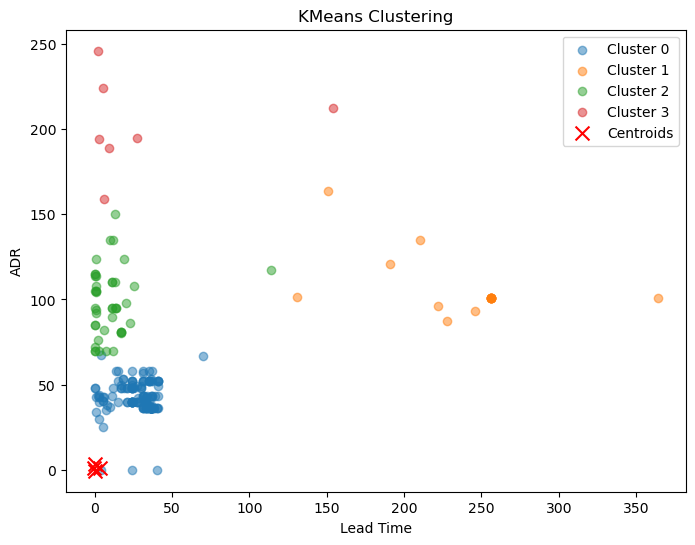

In [7]:
def plot_kmeans_clusters(data, kmeans_model):
    """
    Plot KMeans clustering results with specific labels for each cluster.

    Args:
    data (DataFrame): Input data.
    kmeans_model: Fitted KMeans clustering model.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    for cluster_label in np.unique(kmeans_model.labels_):
        cluster_data = data[kmeans_model.labels_ == cluster_label]
        plt.scatter(cluster_data['lead_time'], cluster_data['adr'], label=f'Cluster {cluster_label}', alpha=0.5)
    
    plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
    plt.title('KMeans Clustering')
    plt.xlabel('Lead Time')
    plt.ylabel('ADR')
    plt.legend()
    plt.show()

# Plot KMeans clustering results with specific labels
plot_kmeans_clusters(hotel_data, kmeans_model)

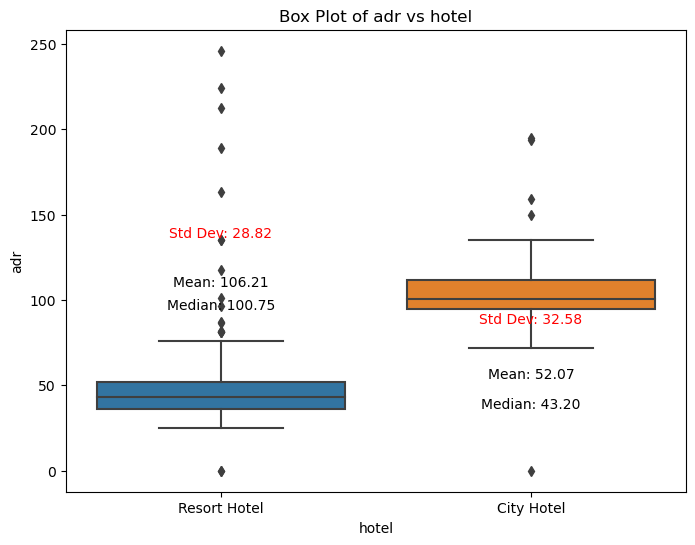

In [17]:
def plot_box_plot(data, x_column, y_column):
    """
    Plot a box plot of the specified columns with mean, median, and standard deviation.

    Args:
    data (DataFrame): Input data.
    x_column (str): Name of the column for x-axis.
    y_column (str): Name of the column for y-axis.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x_column, y=y_column, data=data)
    # Add mean, median, and standard deviation to the plot
    mean = data.groupby(x_column)[y_column].mean()
    median = data.groupby(x_column)[y_column].median()
    std_dev = data.groupby(x_column)[y_column].std()
    for i, label in enumerate(mean.index):
        plt.text(i, mean[label], f'Mean: {mean[label]:.2f}', ha='center', va='bottom', fontsize=10)
        plt.text(i, median[label], f'Median: {median[label]:.2f}', ha='center', va='top', fontsize=10)
        plt.text(i, mean[label] + std_dev[label], f'Std Dev: {std_dev[label]:.2f}', ha='center', va='bottom', fontsize=10, color='red')
    plt.title(f'Box Plot of {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()
plot_box_plot(hotel_data,'hotel','adr')

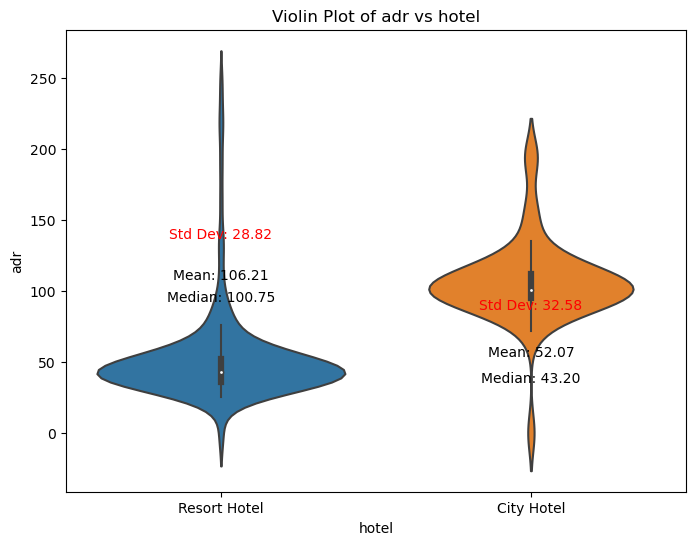

In [43]:

def plot_violin_plot(data, x_column, y_column):
    """
    Plot a violin plot of the specified columns with mean, median, and standard deviation.

    Args:
    data (DataFrame): Input data.
    x_column (str): Name of the column for x-axis.
    y_column (str): Name of the column for y-axis.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=x_column, y=y_column, data=data)
    # Add mean, median, and standard deviation to the plot
    mean = data.groupby(x_column)[y_column].mean()
    median = data.groupby(x_column)[y_column].median()
    std_dev = data.groupby(x_column)[y_column].std()
    for i, label in enumerate(mean.index):
        plt.text(i, mean[label], f'Mean: {mean[label]:.2f}', ha='center', va='bottom', fontsize=10)
        plt.text(i, median[label], f'Median: {median[label]:.2f}', ha='center', va='top', fontsize=10)
        plt.text(i, mean[label] + std_dev[label], f'Std Dev: {std_dev[label]:.2f}', ha='center', va='bottom', fontsize=10, color='red')
    plt.title(f'Violin Plot of {y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()
plot_violin_plot(hotel_data,'hotel','adr')

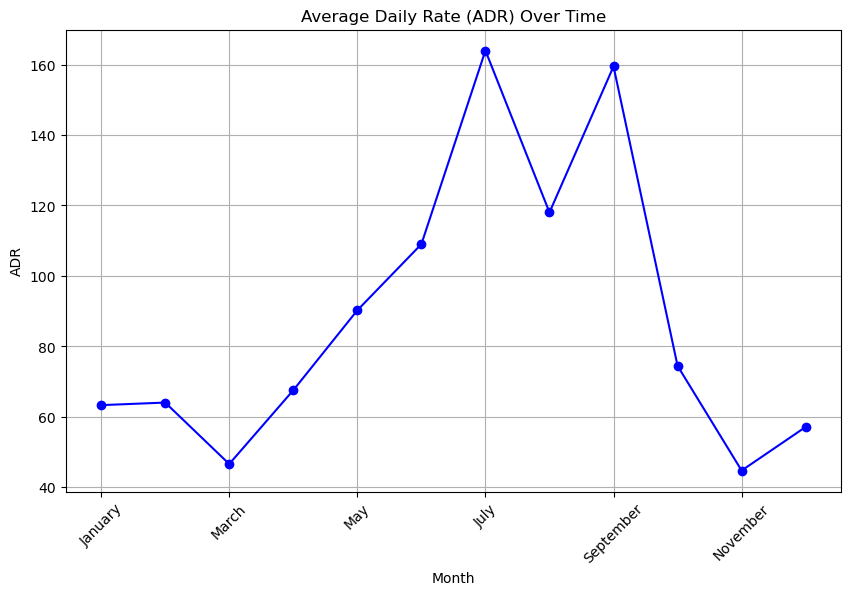

In [10]:
def plot_adr_over_time(data):
    """
    Plot a line plot to visualize the trend of ADR (Average Daily Rate) over time.

    Args:
    data (DataFrame): Input data.

    Returns:
    None
    """
    monthly_adr = data.groupby('arrival_date_month')['adr'].mean()
    months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    monthly_adr = monthly_adr.reindex(months_order)
    
    plt.figure(figsize=(10, 6))
    monthly_adr.plot(kind='line', marker='o', color='blue')
    plt.title('Average Daily Rate (ADR) Over Time')
    plt.xlabel('Month')
    plt.ylabel('ADR')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plot ADR over time
plot_adr_over_time(hotel_data)

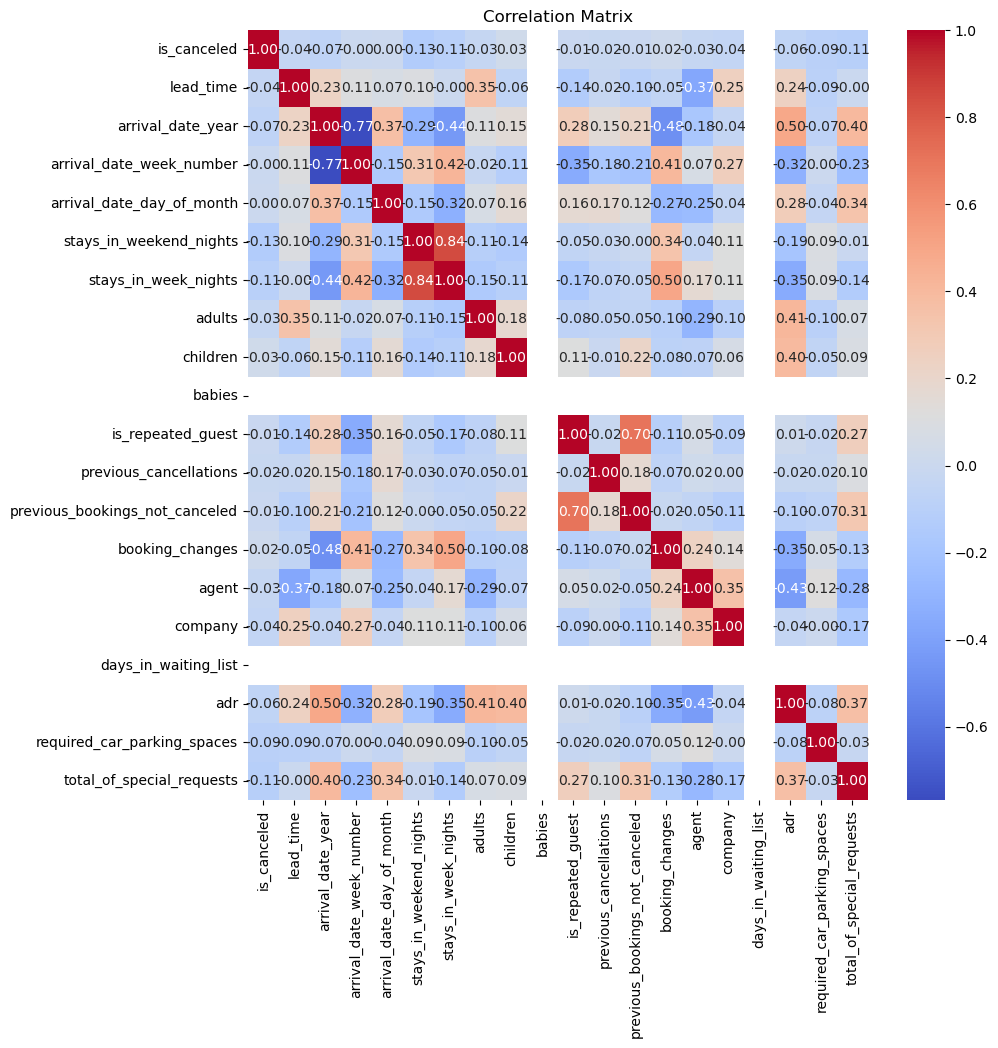

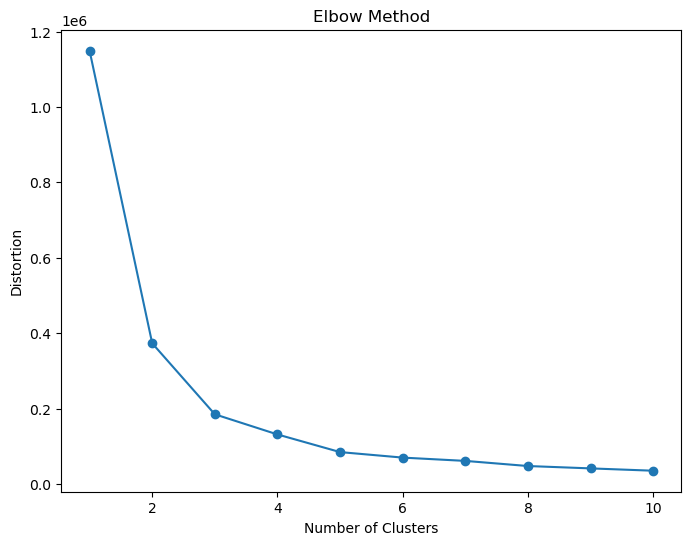

In [42]:
def plot_correlation_heatmap(data):
    """
    Plot a heatmap of the correlation matrix.

    Args:
    data (DataFrame): Input data.

    Returns:
    None
    """
    numeric_data = data.select_dtypes(include=np.number)
    plt.figure(figsize=(10,10))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

# Plot correlation heatmap
plot_correlation_heatmap(hotel_data)

def plot_elbow_method(data, max_clusters=10):
    """
    Plot the elbow method to determine the optimal number of clusters.

    Args:
    data (DataFrame): Input data.
    max_clusters (int): Maximum number of clusters to try.

    Returns:
    None
    """
    numeric_data = data.select_dtypes(include=np.number)
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(numeric_data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8,6))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

# Plot the elbow method
plot_elbow_method(hotel_data[['lead_time', 'adr']])

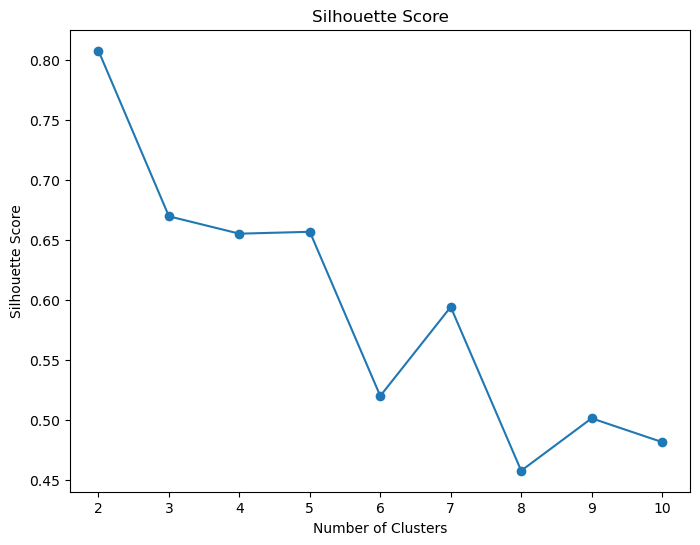

In [12]:
def plot_silhouette_score(data, max_clusters=10):
    """
    Plot the silhouette score to determine the optimal number of clusters.

    Args:
    data (DataFrame): Input data.
    max_clusters (int): Maximum number of clusters to try.

    Returns:
    None
    """
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, cluster_labels))

    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    
# Example usage:
plot_silhouette_score(hotel_data[['lead_time', 'adr']])


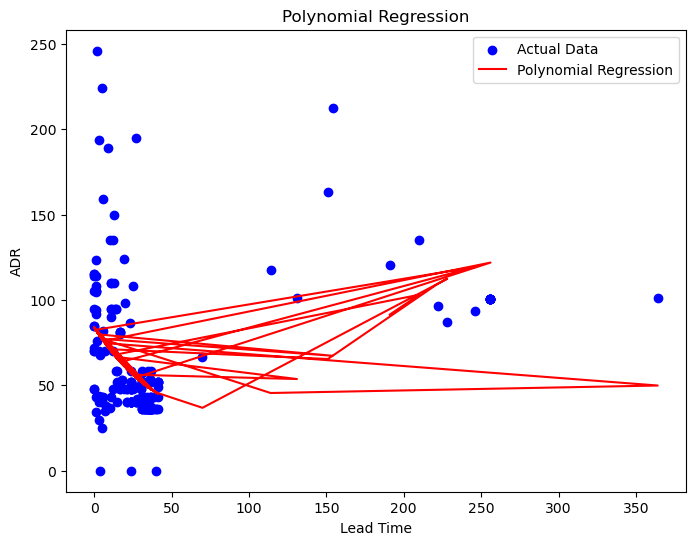

In [13]:
# Define the polynomial regression function
def polynomial_regression(x_train, y_train, degree):
    """
    Perform polynomial regression on the data.

    Args:
    x_train (DataFrame): Input features for training.
    y_train (Series): Target variable for training.
    degree (int): Degree of the polynomial.

    Returns:
    model: Fitted polynomial regression model.
    """
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x_train)
    model = LinearRegression()
    model.fit(x_poly, y_train)
    return model

# Fit polynomial regression model
x_train_poly = hotel_data[['lead_time']]
y_train_poly = hotel_data['adr']
polynomial_model = polynomial_regression(x_train_poly, y_train_poly, degree=3)

# Generate polynomial features
polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x_train_poly)

# Plot the polynomial regression curve
plt.figure(figsize=(8, 6))
plt.scatter(x_train_poly, y_train_poly, color='blue', label='Actual Data')
plt.plot(x_train_poly, polynomial_model.predict(x_poly), color='red', label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('Lead Time')
plt.ylabel('ADR')
plt.legend()
plt.show()